# 16 - Pontos de Interesse e casamento de imagens

Neste roteiro iremos estudar o comportamento de algoritmos de detecção e descrição de pontos de interesse e como usá-los para fazer uma versão simplificada de um algoritmo de busca de imagens. 

## AVISO

Existe uma grande quantidade de tutoriais online com códigos de exemplo para este problema, mas **seu uso não é recomendado**. Além de muitos conterem material claramente desatualizado, muitos tutoriais encorajam um simples copiar-colar de código sem levar em conta as *ideias que o motivaram*. Nesta atividade recomendamos usar, como material complementar, a [documentação do OpenCV em Python](https://docs.opencv.org/3.4.3/d6/d00/tutorial_py_root.html) sobre [Feature Detection and Description](https://docs.opencv.org/3.4.3/db/d27/tutorial_py_table_of_contents_feature2d.html).

## Banco de imagens para a aula

Neste primeiro roteiro iremos trabalhar com um conjunto de imagens que não é focado exclusivamente em recuperação de informação, mas sim em detecção de objetos. Iremos usar a versão de 2005 do [Pascal VOC Challenge](http://host.robots.ox.ac.uk/pascal/VOC/databases.html#VOC2005_1), que você já deve ter baixado. Se não baixou ainda, o download não é pequeno (465Mb) então deixe baixando e prossiga com o roteiro. 


## Pesquisa

1. Detectores de pontos de interesse são classificados, basicamente, em três tipos. Quais são eles e quais características locais das imagens são exploradas?

R: Detectores de bordas salientes, texturas e cantos.

2. O OpenCV possui diversos algoritmos para detecção e descrição de pontos de interesse. Faça uma lista deles abaixo (deixando bem claro qual método faz detecção, extração ou ambos). Coloque o nome do método, a classe que o implementa e seu tipo (para os detectores somente).

#### Deteccao:
- cv.cornerHarris() - corner e edge
- cv.cornerSubPixel() - corner e edge
- cv.goodFeaturesToTrack() - corner

#### Extracao:
- cv.xfeatures2d.SIFT_create().detect()
- cv.xfeatures2d.ORB_create().detect()

#### Extracao e Deteccao:

- cv.xfeatures2d.SURF_create().detectAndCompute(img,None) - corner
- cv.xfeatures2d.SIFT_create().compute() - corner
- cv.xfeatures2d.ORB_create().compute() - corner



3. Escolha um dos métodos acima e descreva sua ideia básica no campo abaixo. Você deve indicar em qual artigo ele foi proposto, quais suas características marcantes em relação aos outros métodos e uma aplicação em que este descritor obteve resultados relavantes. 

#### R:
Harris Corner detector, o algoritmo de detecção de cantos e bordas de Chris Harris, foi abordado em 1988 pelo paper A Combined Corner and Edge Detector. A ideia eh achar a diferença de intensidade em todas as direcoes para cada vetor para um pixel

## Implementação

Vamos agora implementar o método de similaridade de imagens descrito na aula expositiva, resumido abaixo. Você receberá como entrada uma imagem de busca $Q$ e um banco de imagens $\{F^i\}_{i=0}^N$ contendo $N$ imagens.

1. Detecte os pontos de interesse e extraia os descritores $\{q_j\}$ de $Q$
2. Para cada imagem $F^i$:
    - Detecte os pontos de interesse e extraia os descritores $\{F_k\}$ de $F^i$ 
    - Para cada descritor $q_j$, verifique se existe um descritor $F_k$ que casa com ele
    - Calcule a proporção de descritores de $Q$ que casaram com descritores de $F^i$ e use este valor como a similaridade entre as duas imagens.
    
3. Retorne as 5 imagens com maior similaridade;

### Exercício

Antes de continuar, leia com atenção o algoritmo acima e pense: como você organizaria seu código para implementá-lo? Quais funções auxiliares criaria e quais argumentos cada uma receberia? Supondo que todas essas funções auxiliares já foram implementadas, como seria o código principal de seu programa?

*organização do programa aqui*

In [72]:
# seu código esboço aqui
# funcs
def detect_and_describe(imagem):
    descriptors = []
    return descriptors

def match_descriptors(qj, fk):
    return True

def most_similar(list_imgs):
    most_similar = []
    return most_similar


CODIGO ABAIXO NAO REPRESENTA VERSAO FINAL DO ALGORITMO

```python
q = cv.imread(imagem_buscada)
qj_list = detect_and_describe(q)

f_list = [cv.imread(filename) for filename in imagens_database]

match_score = []
for f in f_list:
    fk_list = detect_and_describe(f)
    count_matches = 0
    for qj in qj_list:
        for fk in fk_list:
            if match_descriptors(qj, fk):
                count_matches += 1
                break
    match_score.append(count_matches/len(qj))
```

### Extração e descrição de pontos de interesse

A detecção e descrição de pontos de interesse é um processo que será repetido várias vezes nesta e na próxima atividade. Na parte de pesquisa você identificou alguns métodos de extração e descrição de pontos de interesse. Selecione um de cada tipo (ou um que faça ambos) e crie uma função que recebe uma imagem e retorna os descritores dela. Mesmo que a função seja muito pequena (duas ou três linhas), é uma boa fazê-lo para deixar o programa principal mais legível e parecido com o algoritmo descrito em linguagem natural. 

OBS: os exercícios foram testados usando o descritor *ORB*. Você pode usar outro nos seus testes, mas pode ter que adaptar parte do código. 

In [73]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import os

In [74]:
def des_to_bin(des):
    res_des = []
    for des_vec in des:
        res_des_bin = '' 
        for single in des_vec:
            bin_num = str(bin(single))[2:]
            
            while len(bin_num) < 8:
                bin_num = "0" + bin_num
            
            res_des_bin += bin_num
        res_des.append(res_des_bin)
    return res_des

In [75]:
img = cv.imread('cachorro.jpg', 1)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp = orb.detect(img,None)
# compute the descriptors with
kp, des = orb.compute(img, kp)

des = des_to_bin(des)

print(des[0:3])

['0111001000101011100000101011110000001001111100001001000001000110101010010000010010000000101010011010111011101110001001111101011011001000111100111110101110000001000011100100101110000010111010011001000101110100100110100011101100010000011011000011111101001110', '1101001011010010001111111011101000101100110010000001000101010101101011110101111110010011011101011110111011011110011010100100101011100111001101111111110100000001110001100000110110101010111100011101000011110011011110101101101100010000000011001000010101001011', '0100011111100000011000111000101001111101110101001110101011101100101010110101000110000000100000110100100011001110011111001111011011100010110001011111101111010111110001110000011110001110111101010011100100111000100011101111111000010101000101110111101101010100']


Teste sua função usando a imagem *cachorro.jpg*. Você pode visualilzar os pontos de interesse usando a função [`cv2.drawKeypoints()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#gab958f8900dd10f14316521c149a60433).

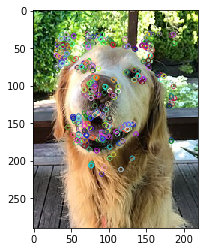

In [76]:
# código de teste aqui.
img_kp = img.copy() 
cv.drawKeypoints(img, kp, img_kp)
plt.imshow(img_kp)

### Casamento de pontos de interesse

O OpenCV possui duas técnicas de casamento de pontos de interesse implementadas: `cv2.BFMatcher` e `cv2.FlannBasedMatcher`. Para exercitar a compreensão do algoritmo de casamento vamos implementar nossa própria versão do `BFMatcher`. 

----------

Sim, no projeto vocês podem usar as implementações do OpenCV. Na próxima aula iremos usar o `FlannBasedMatcher` e usar um novo critério para casamento de pontos. 

----------

#### Exercício:

Implemente uma função `reciprocal_math(desc1, desc2)` que faz o casamento dos descritores passados como argumento. Um par de descritores $(d^1_i, d^2_j)$ *casa* se $dist(d^1_i, d^2_j) < dist(d^1_k, d^2_j), k\neq i$ **E** $dist(d^1_i, d^2_j) < dist(d^1_i, d^2_k), k\neq j$. Como função de distância tem duas opções:

1. Se os dados computados pelo seu descritor forem um vetor de float você pode usar a norma $\ell_2$ da diferença dos vetores

$$
dist(d^1_i, d^2_j) = ||d^1_i - d^2_j||_2
$$

2. Se os dados computados forem um vetor de bits você deve usar como distância o número de bits diferentes entre as duas strings. Isto pode ser feito, em Python, em três passos:
    1. Vetores de bits são representados por vetores de inteiros de 8 bits. Para cada um dos inteiros:
    2. Converta-o para uma string contendo sua representação em binário usando a função `format`.
    3. Conte o número de caracteres diferentes nas strings

Para que nossa função `reciprocal_match` seja integrada ao OpenCV precisamos retornar uma lista de objetos do tipo `cv2.DMatch`. Para criar um objeto deste tipo basta chamar o construtor com três parâmetros:

1. índice $i$ do descritor da imagem de pesquisa
2. índice $j$ do descritor da imagem do banco
3. distância calculada como a fórmula acima

In [77]:
def dist(i, j):
    diff_sum = 0
        
    for ci, cj in zip(i, j):
        if ci != cj:
            diff_sum += 1

    return diff_sum


def reciprocal_match(desc1, desc2):
    desc1 = des_to_bin(desc1)
    desc2 = des_to_bin(desc2)
    match_list = []
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            match_kj = True
            match_ik = True
            
            dist_ij = dist(desc1[i], desc2[j])
            
            for k in range(len(desc1)):
                if k != i:
                    dist_kj = dist(desc1[k], desc2[j])
                    if dist_ij >= dist(desc1[k], desc2[j]):
                        match_kj = False
                        break
            
            if match_kj: #otimizando
                for k in range(len(desc2)):
                    if k != j:
                        dist_ik = dist(desc1[i], desc2[k])
                        if dist_ij >= dist_ik:
                            match_ik = False
                            break

            if match_kj and match_ik:
                match_list.append(cv.DMatch(i, j, dist_ij))
    
    return match_list

Vamos analisar os resultados dessa função de casamento usando as imagens *cachorro2.png* e *cidade.jpeg*. Extraia os descritores de ambas e faça um casamento com os descritores extraídos no exercício anterior. Para mostrar os resultados você pode usar a função [`cv2.DrawMatches()`](https://docs.opencv.org/3.4.3/d4/d5d/group__features2d__draw.html#ga7421b3941617d7267e3f2311582f49e1). Mostre também a distância média dos casamentos encontrados. Para comparar, mostre a distância média dos 100 casamentos com menor distância para cada imagem.

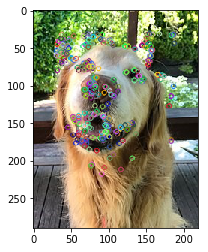

In [78]:
# cachorro2.png
cao = cv.imread('cachorro.jpg',1)
cao = cv.cvtColor(cao, cv.COLOR_BGR2RGB)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp_cao = orb.detect(cao,None)
# compute the descriptors with
kp_cao, des_cao = orb.compute(cao, kp_cao)

img_cao = cao.copy() 
cv.drawKeypoints(cao, kp_cao, img_cao)
plt.imshow(img_cao)

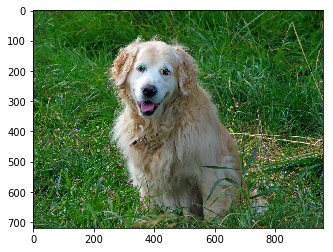

In [79]:
# cidade.jpeg
cao2 = cv.imread('cachorro2.jpg',1)
cao2 = cv.cvtColor(cao2, cv.COLOR_BGR2RGB)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp_cao2 = orb.detect(cao2,None)
# compute the descriptors with
kp_cao2, des_cao2 = orb.compute(cao2, kp_cao2)

img_cao2 = cao2.copy() 
cv.drawKeypoints(cao2, kp_cao2, img_cao2)
plt.imshow(img_cao2)

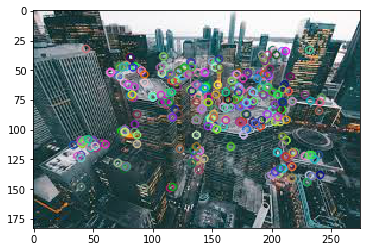

In [82]:
# cidade.jpeg
city = cv.imread('cidade.jpeg',1)
city = cv.cvtColor(city, cv.COLOR_BGR2RGB)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp_city = orb.detect(city,None)
# compute the descriptors with
kp_city, des_city = orb.compute(city, kp_city)

img_city = city.copy() 
cv.drawKeypoints(city, kp_city, img_city)
plt.imshow(img_city)

In [83]:
match_list = reciprocal_match(des_cao, des_city)

In [84]:
print(len(match_list))

129


In [86]:
img4 = cao2.copy()
img3 = cv.drawMatches(cao, kp_cao, city, kp_city, match_list, img4, flags=2)

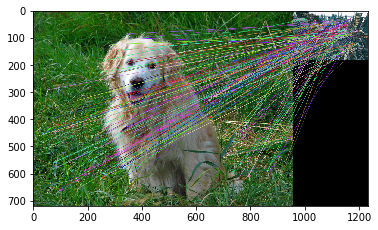

In [87]:
plt.imshow(img3)

In [88]:
sum_dist = 0
for i in match_list:
    sum_dist += i.distance

media = sum_dist/len(match_list)
print(media) 

69.90697674418605


In [89]:
match_list = sorted(match_list, key = lambda x:x.distance)

i = 0
sum_dist = 0
while i < 100:
    sum_dist += match_list[i].distance
    i += 1

media = sum_dist/100
print(media)

67.16


Em ambos os casos houveram muitos casamentos, mas a distância média foi (deveria ser) menor no caso do cachorro. Modifique a função `reciprocal_match` para receber um terceiro argumento que representa a distância máxima entre descritores para que o casamento seja válido. Determine, então, um valor que torne o número de descritores encontrados nas imagens acima significativamente diferente. 

In [90]:
def reciprocal_match_limit(desc1, desc2, max_dist=10000):
    desc1 = des_to_bin(desc1)
    desc2 = des_to_bin(desc2)
    match_list = []
    for i in range(len(desc1)):
        for j in range(len(desc2)):
            match_kj = True
            match_ik = True
            
            dist_ij = dist(desc1[i], desc2[j])
            
            if dist_ij > max_dist:
                match_kj = False
                match_ik = False
                
            
            if match_ik: #otimizando
                for k in range(len(desc1)):
                    if k != i:
                        dist_kj = dist(desc1[k], desc2[j])
                        if dist_ij >= dist(desc1[k], desc2[j]):
                            match_kj = False
                            break
            
            if match_kj: #otimizando
                for k in range(len(desc2)):
                    if k != j:
                        dist_ik = dist(desc1[i], desc2[k])
                        if dist_ij >= dist_ik:
                            match_ik = False
                            break

            if match_kj and match_ik:
                match_list.append(cv.DMatch(i, j, dist_ij))
    
    return match_list

In [95]:
match_list = reciprocal_match_limit(des_cao2, des_city, 60)

In [96]:
print(len(match_list))

10


In [97]:
img4 = cao2.copy()
img3 = cv.drawMatches(cao2, kp_cao2, cao, kp_cao, match_list, img4, flags=2)

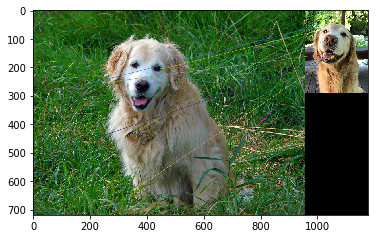

In [98]:
plt.imshow(img3)

Teste o valor determinado com a imagem *cachorro3.jpg*. Comente os resultados obtidos.

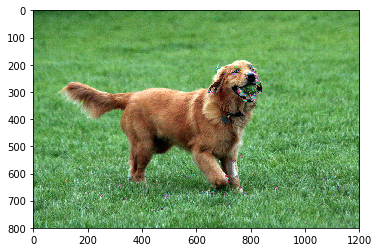

In [105]:
# cachorro3.jpg
cao3 = cv.imread('cachorro3.jpg', 1)
cao3 = cv.cvtColor(cao3, cv.COLOR_BGR2RGB)
# Initiate ORB detector
orb = cv.ORB_create()
# find the keypoints with ORB
kp_cao3 = orb.detect(cao3,None)
# compute the descriptors with
kp_cao3, des_cao3 = orb.compute(cao3, kp_cao3)

img_cao3 = cao3.copy() 
cv.drawKeypoints(cao3, kp_cao3, img_cao3)
plt.imshow(img_cao3)

In [106]:
match_list = reciprocal_match_limit(des_cao2, des_cao3, 60)

In [107]:
print(len(match_list))

34


In [108]:
sum_dist = 0
for i in match_list:
    sum_dist += i.distance

media = sum_dist/len(match_list)
print(media) 

54.088235294117645


In [109]:
img4 = cao2.copy()
img3 = cv.drawMatches(cao2, kp_cao2, cao3, kp_cao3, match_list, img4, flags=2)

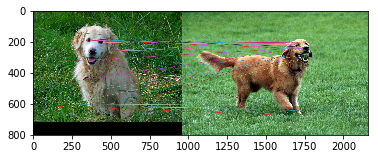

In [110]:
plt.imshow(img3)

#### R:
O match parece fazer sentido, apesar de algumas anomalias. É notavel a melhoria no match ao limitar a distancia para o casamento dos pontos

### Juntando tudo

Use as funções acima para calcular a similaridade entre duas imagens, definida como a proporção de pontos casados em relação ao número de pontos da imagem de pesquisa $Q$. Sua função deve se chamar `similarity_proportion_matches` e deve receber duas imagens como entrada e retornar um número entre $0$ (totalmente diferente) e $1$ (idênticas). 

In [111]:
# seu código aqui

def similarity_proportion_matches(img1, img2, max_dist=10000):
    orb = cv.ORB_create()
    
    kp1 = orb.detect(img1,None)
    kp1, des1 = orb.compute(img1, kp1)
    
    kp2 = orb.detect(img2,None)
    kp2, des2 = orb.compute(img2, kp2)
    
    match_list = reciprocal_match_limit(des1, des2, max_dist)
    
    return len(match_list)/len(des1)

Rode sua função com as imagens usadas no exercício anterior e verifique se sua função de similaridade ordenaria as imagens de maneira satisfatória.

In [112]:
score = similarity_proportion_matches(cao2, city)
print(score)

0.258


### Testes e avaliação crítica dos resultados

Você deve agora executar seu código nas imagens da base de dados sugerida no começo do roteiro. São presentes apenas imagens com 4 objetos diferentes: pessoas, motos, bicicletas e carros. Selecione uma imagem de cada tipo e mostre as 3 imagens com maior similaridade para cada uma delas.

In [113]:
DIR_TESTE = 'teste/'
teste_list = os.listdir(DIR_TESTE)

In [114]:
img_busca = cv.imread("pessoa.png", 1)

pessoas_scores = {}

for i in teste_list:
    img_db = cv.imread(DIR_TESTE + i, 1)
    score = similarity_proportion_matches(img_busca, img_db, 50)
    
    pessoas_scores[i] = score

print(pessoas_scores)

{'0001.png': 0.008, '0002.png': 0.004, '0008.png': 0.004, '0009.png': 0.008, '0010.png': 0.002, 'bike_103.png': 0.014, 'bike_113.png': 0.008, 'bike_124.png': 0.008, 'bike_125.png': 0.0, 'bike_126.png': 0.006, 'carsgraz_012.png': 0.004, 'carsgraz_075.png': 0.008, 'carsgraz_078.png': 0.012, 'carsgraz_079.png': 0.012, 'carsgraz_088.png': 0.008, 'person_004.png': 0.008, 'person_005.png': 0.022, 'person_018.png': 0.01, 'person_019.png': 0.004, 'person_023.png': 0.006}


In [119]:
img_busca = cv.imread("moto.png", 1)

motos_scores = {}

for i in teste_list:
    img_db = cv.imread(DIR_TESTE + i, 1)
    score = similarity_proportion_matches(img_busca, img_db, 45)
    
    motos_scores[i] = score

print(motos_scores)

{'0001.png': 0.022, '0002.png': 0.038, '0008.png': 0.044, '0009.png': 0.036, '0010.png': 0.108, 'bike_103.png': 0.0, 'bike_113.png': 0.004, 'bike_124.png': 0.004, 'bike_125.png': 0.006, 'bike_126.png': 0.006, 'carsgraz_012.png': 0.012, 'carsgraz_075.png': 0.004, 'carsgraz_078.png': 0.004, 'carsgraz_079.png': 0.002, 'carsgraz_088.png': 0.016, 'person_004.png': 0.002, 'person_005.png': 0.024, 'person_018.png': 0.012, 'person_019.png': 0.002, 'person_023.png': 0.004}


In [120]:
img_busca = cv.imread("bicicleta.png", 1)

bicicletas_scores = {}

for i in teste_list:
    img_db = cv.imread(DIR_TESTE + i, 1)
    score = similarity_proportion_matches(img_busca, img_db, 50)
    
    bicicletas_scores[i] = score

print(bicicletas_scores)

{'0001.png': 0.01, '0002.png': 0.004, '0008.png': 0.008, '0009.png': 0.018, '0010.png': 0.006, 'bike_103.png': 0.01, 'bike_113.png': 0.018, 'bike_124.png': 0.01, 'bike_125.png': 0.008, 'bike_126.png': 0.006, 'carsgraz_012.png': 0.02, 'carsgraz_075.png': 0.012, 'carsgraz_078.png': 0.016, 'carsgraz_079.png': 0.012, 'carsgraz_088.png': 0.022, 'person_004.png': 0.016, 'person_005.png': 0.012, 'person_018.png': 0.028, 'person_019.png': 0.026, 'person_023.png': 0.014}


In [44]:
img_busca = cv.imread("carro.png", 1)

carros_scores = {}

for i in teste_list:
    img_db = cv.imread(DIR_TESTE + i, 1)
    score = similarity_proportion_matches(img_busca, img_db, 50)
    
    carros_scores[i] = score

print(carros_scores)

{'0009.png': 0.01, '0010.png': 0.006, '0011.png': 0.01, 'bike_002.png': 0.01, 'bike_006.png': 0.01, 'bike_013.png': 0.018, 'carsgraz_012.png': 0.034, 'carsgraz_078.png': 0.05, 'carsgraz_079.png': 0.014, 'person_005.png': 0.018, 'person_018.png': 0.016, 'person_019.png': 0.016}


### IMAGEM DE MOTO BUSCADA:

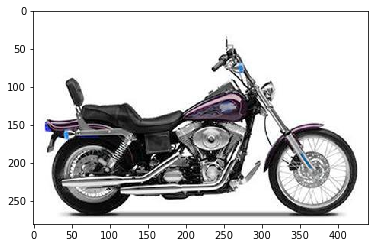

In [38]:
test_img = cv.imread("moto.png", 1)
plt.imshow(test_img)

### TOP 3 RESULTADOS

[('0011.png', 1.0), ('0010.png', 0.08), ('0009.png', 0.022)]


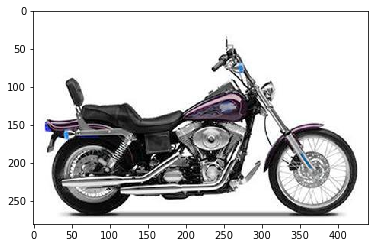

In [40]:
top_motos = sorted(motos_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_motos)

plt.imshow(cv.imread(DIR_TESTE + top_motos[0][0], 1))

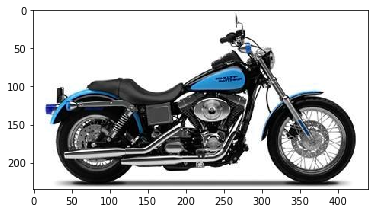

In [41]:
plt.imshow(cv.imread(DIR_TESTE + top_motos[1][0], 1))

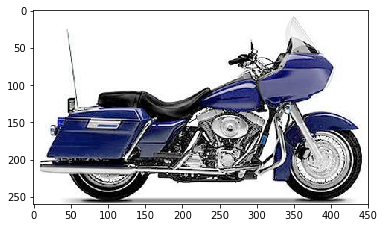

In [42]:
plt.imshow(cv.imread(DIR_TESTE + top_motos[2][0], 1))

### IMAGEM DE CARRO BUSCADA:

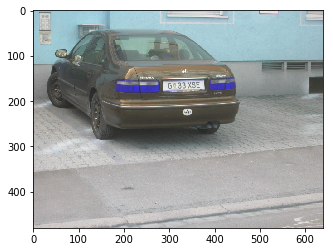

In [45]:
test_img = cv.imread("carro.png", 1)
plt.imshow(test_img)

### TOP 3 RESULTADOS

[('carsgraz_078.png', 0.05), ('carsgraz_012.png', 0.034), ('bike_013.png', 0.018)]


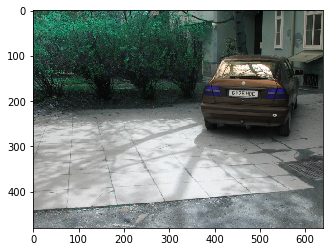

In [46]:
top_carros = sorted(carros_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_carros)

plt.imshow(cv.imread(DIR_TESTE + top_carros[0][0], 1))

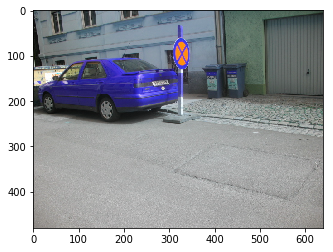

In [48]:
plt.imshow(cv.imread(DIR_TESTE + top_carros[1][0], 1))

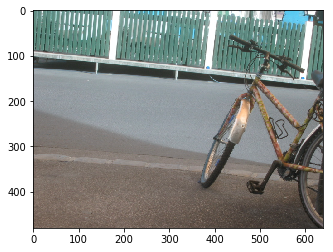

In [49]:
plt.imshow(cv.imread(DIR_TESTE + top_carros[2][0], 1))

### IMAGEM DE BICICLETA BUSCADA

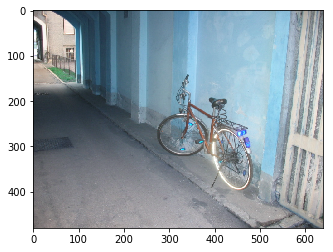

In [56]:
test_img = cv.imread("bicicleta.png", 1)
plt.imshow(test_img)

### TOP 3 RESULTADOS

[('carsgraz_078.png', 0.05), ('carsgraz_012.png', 0.034), ('bike_013.png', 0.018)]


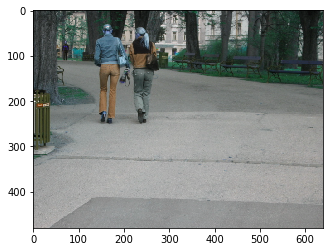

In [57]:
top_bicicletas = sorted(bicicletas_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_carros)

plt.imshow(cv.imread(DIR_TESTE + top_bicicletas[0][0], 1))

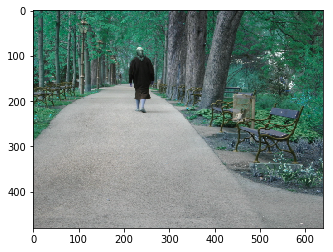

In [58]:
plt.imshow(cv.imread(DIR_TESTE + top_bicicletas[1][0], 1))

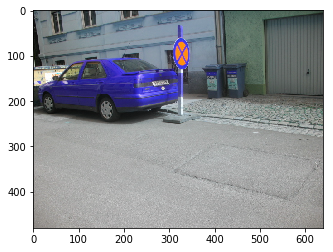

In [62]:
plt.imshow(cv.imread(DIR_TESTE + top_bicicletas[2][0], 1))

### IMAGEM DE PESSOA BUSCADA:

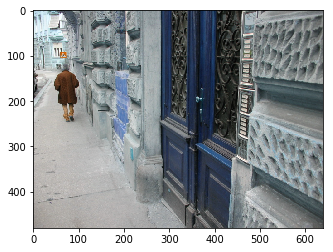

In [115]:
test_img = cv.imread("pessoa.png", 1)
plt.imshow(test_img)

### TOP 3 RESULTADOS

[('person_005.png', 0.022), ('bike_103.png', 0.014), ('carsgraz_078.png', 0.012)]


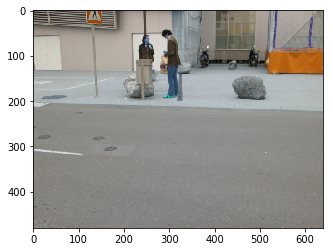

In [116]:
top_pessoas = sorted(pessoas_scores.items(), key=lambda x: x[1], reverse=True)[:3]
print(top_pessoas)

plt.imshow(cv.imread(DIR_TESTE + top_pessoas[0][0], 1))

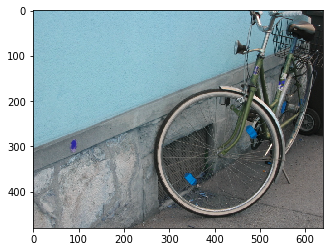

In [117]:
plt.imshow(cv.imread(DIR_TESTE + top_pessoas[1][0], 1))

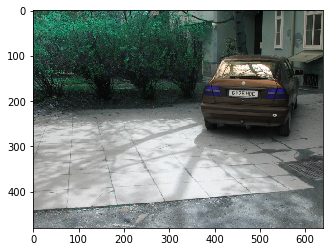

In [118]:
plt.imshow(cv.imread(DIR_TESTE + top_pessoas[2][0], 1))

*Meus comentários sobre os resultados aqui*

Faça agora uma busca usando uma imagem focada em um outro objeto qualquer e mostre as 3 imagens mais similares abaixo. 

*Meus comentários sobre os resultados aqui*

### Análise crítica e Revisão de conceitos

Descreva com suas próprias palavras o quê são pontos de interesse e descritores.  

#### R:
Pontos de interesse sao pontos facilmente distinguiveis e marcantes na imagem, como bordas salientes, texturas e cantos, motivo pelo qual detectores de pontos de interesse sao geralmente divididos entre estes 3 tipos. Ja descritores sao um conjunto de caracteristicas aferidas de um ponto de interesse, geralmente representado por um vetor de valores numericos

Construimos uma abordagem que ordenou as três imagens testadas. Comente uma desvantagem desta abordagem. 

#### R:
Uma desvantagem eh que, enquanto um match de imagem a e b eh x, b e a nao assumem o mesmo valor x.